# 🤖 10.3 — Aprendizaje Supervisado con Scikit-learn

En este notebook aprenderás a entrenar y evaluar modelos de **clasificación de texto** utilizando los vectores generados en el preprocesado.

📘 *Objetivo:* construir un modelo capaz de **distinguir el tema o categoría de una frase** a partir de su contenido textual.

---

In [17]:
# 🚀 Instalación y librerías
try:
    import nltk
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
except ImportError:
    import sys
    !{sys.executable} -m pip install nltk scikit-learn pandas matplotlib
    import nltk, pandas as pd, numpy as np, matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

print('✅ Librerías cargadas correctamente.')

✅ Librerías cargadas correctamente.


## 1️⃣ Dataset de ejemplo

Usaremos un pequeño conjunto de frases **etiquetadas manualmente** en tres categorías: *tecnología*, *deporte* y *salud*.

In [18]:
datos = {
    'texto': [
        'Python es un lenguaje popular para el análisis de datos',
        'El aprendizaje automático está transformando la tecnología',
        'El fútbol es el deporte más seguido del mundo',
        'Messi marcó un gol espectacular en el último partido',
        'Comer frutas mejora la salud cardiovascular',
        'El ejercicio físico diario ayuda a prevenir enfermedades',
        'Las redes neuronales son parte del aprendizaje profundo',
        'El baloncesto requiere velocidad y precisión',
        'Una dieta equilibrada mejora la energía y el bienestar',
        'Los algoritmos de clasificación predicen categorías'
    ],
    'categoria': [
        'tecnologia', 'tecnologia', 'deporte', 'deporte', 'salud',
        'salud', 'tecnologia', 'deporte', 'salud', 'tecnologia'
    ]
}
df = pd.DataFrame(datos)
df

,texto,categoria
0,Python es un lenguaje popular para el análisis...,tecnologia
1,El aprendizaje automático está transformando l...,tecnologia
2,El fútbol es el deporte más seguido del mundo,deporte
3,Messi marcó un gol espectacular en el último p...,deporte
4,Comer frutas mejora la salud cardiovascular,salud
5,El ejercicio físico diario ayuda a prevenir en...,salud
6,Las redes neuronales son parte del aprendizaje...,tecnologia
7,El baloncesto requiere velocidad y precisión,deporte
8,Una dieta equilibrada mejora la energía y el b...,salud
9,Los algoritmos de clasificación predicen categ...,tecnologia


In [19]:
# 🔁 Ampliamos el dataset para tener suficientes ejemplos por clase
nuevos_datos = [
    ('La inteligencia artificial mejora los diagnósticos médicos', 'salud'),
    ('Dormir bien mejora la salud mental', 'salud'),
    ('El ciclismo es un deporte excelente para la resistencia', 'deporte'),
    ('El tenis femenino gana popularidad en Europa', 'deporte'),
    ('Python es ampliamente usado en análisis de datos', 'tecnologia'),
    ('Las startups tecnológicas siguen creciendo en España', 'tecnologia'),
]

# Añadimos los nuevos datos
df = pd.concat([df, pd.DataFrame(nuevos_datos, columns=['texto', 'categoria'])], ignore_index=True)

print('✅ Dataset extendido con', len(df), 'registros')
print(df['categoria'].value_counts())


✅ Dataset extendido con 16 registros
categoria
tecnologia    6
deporte       5
salud         5
Name: count, dtype: int64


## 2️⃣ Vectorización TF-IDF

Convertimos el texto en vectores numéricos con `TfidfVectorizer`, eliminando palabras vacías (stopwords) en español.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords', quiet=True)
stop_words_es = stopwords.words('spanish')

vectorizador = TfidfVectorizer(stop_words=stop_words_es)

X = vectorizador.fit_transform(df['texto'].tolist())
y = df['categoria']

print('🔤 Vocabulario:', len(vectorizador.get_feature_names_out()), 'palabras')
print('📊 Matriz de características:', X.shape)



🔤 Vocabulario: 68 palabras
📊 Matriz de características: (16, 68)


## 3️⃣ División de datos

Separaremos los datos en entrenamiento (80%) y prueba (20%).

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('📚 Entrenamiento:', X_train.shape[0], 'muestras')
print('🧪 Prueba:', X_test.shape[0], 'muestras')


📚 Entrenamiento: 12 muestras
🧪 Prueba: 4 muestras


## 4️⃣ Entrenamiento con Naive Bayes

El modelo **MultinomialNB** es ideal para texto, donde las variables son recuentos o frecuencias de palabras.

In [22]:
modelo_nb = MultinomialNB()
modelo_nb.fit(X_train, y_train)

y_pred_nb = modelo_nb.predict(X_test)
print('🎯 Precisión (Naive Bayes):', round(accuracy_score(y_test, y_pred_nb), 3))

🎯 Precisión (Naive Bayes): 1.0


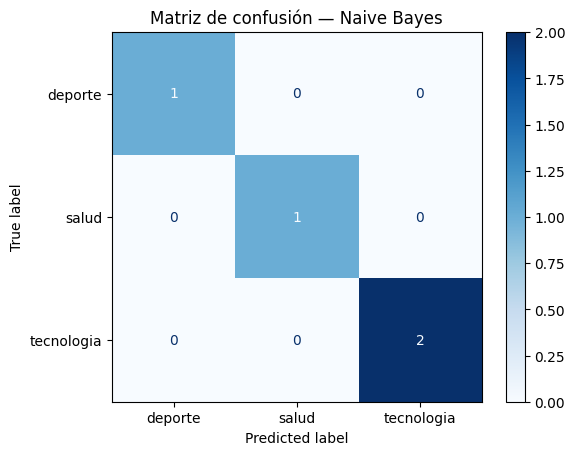

📋 Reporte de clasificación:
               precision    recall  f1-score   support

     deporte       1.00      1.00      1.00         1
       salud       1.00      1.00      1.00         1
  tecnologia       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [23]:
cm = confusion_matrix(y_test, y_pred_nb, labels=modelo_nb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_nb.classes_).plot(cmap='Blues')
plt.title('Matriz de confusión — Naive Bayes')
plt.show()

print('📋 Reporte de clasificación:\n', classification_report(y_test, y_pred_nb))

## 5️⃣ 🧩 Ejercicio — Regresión Logística

👉 Crea un modelo de Regresión Logística y compáralo con el Naive Bayes anterior.

In [24]:
# ✏️ Tu código aquí...

### ✅ Solución propuesta

🎯 Precisión (Regresión Logística): 0.75


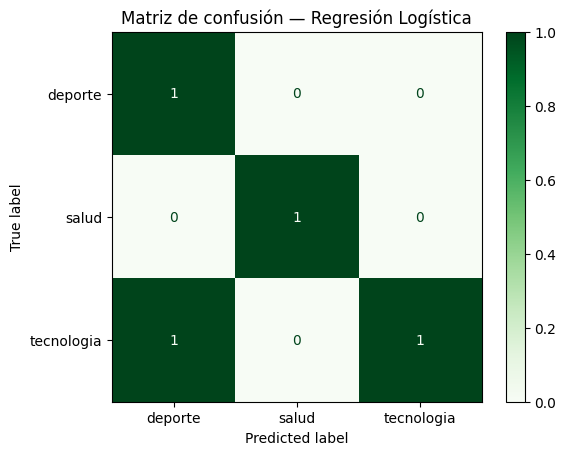

In [25]:
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

print('🎯 Precisión (Regresión Logística):', round(accuracy_score(y_test, y_pred_lr), 3))
ConfusionMatrixDisplay.from_estimator(modelo_lr, X_test, y_test, cmap='Greens')
plt.title('Matriz de confusión — Regresión Logística')
plt.show()

## 6️⃣ Predicción sobre texto nuevo

In [26]:
nuevos_textos = [
    'El yoga mejora la flexibilidad y reduce el estrés',
    'Google desarrolla modelos de inteligencia artificial',
    'El Real Madrid ganó el campeonato'
]

X_nuevos = vectorizador.transform(nuevos_textos)
predicciones = modelo_lr.predict(X_nuevos)

for texto, categoria in zip(nuevos_textos, predicciones):
    print(f"🗞️ '{texto}' → {categoria}")

🗞️ 'El yoga mejora la flexibilidad y reduce el estrés' → salud
🗞️ 'Google desarrolla modelos de inteligencia artificial' → salud
🗞️ 'El Real Madrid ganó el campeonato' → deporte


---
## 🧠 Conclusiones

- **Naive Bayes:** rápido y eficaz para texto corto.
- **Regresión Logística:** mayor precisión en datasets balanceados.
- **TF-IDF:** reduce ruido y mejora discriminación de términos.

💡 *Siguiente paso → 10.4 — Aprendizaje No Supervisado (KMeans / PCA)*